# Genetik Algoritma ile Raf Optimizasyonu

Amaç:
Bu çalışmada akıllı bir depoda raf yüksekliği (x₁) ve raf derinliği (x₂)
optimize edilerek depo verim puanı maksimize edilmiştir.

Amaç Fonksiyonu:
y = 4x₁ + 3x₂ − 0.5x₁x₂

Kısıtlar:
- x₁ + x₂ ≤ 8
- x₂ ≥ 1.5


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

POP_SIZE = 50
GENERATIONS = 100
MUTATION_RATE = 0.1
ELITISM = 2

X1_BOUNDS = (2, 6)
X2_BOUNDS = (1, 4)


In [3]:
def fitness(individual):
    x1, x2 = individual
    y = 4*x1 + 3*x2 - 0.5*x1*x2

    # Kısıt cezaları
    if x1 + x2 > 8:
        y -= 100
    if x2 < 1.5:
        y -= 100

    return y


In [4]:
def create_individual():
    return [
        random.uniform(*X1_BOUNDS),
        random.uniform(*X2_BOUNDS)
    ]

def crossover(parent1, parent2):
    alpha = random.random()
    return [
        alpha * parent1[0] + (1 - alpha) * parent2[0],
        alpha * parent1[1] + (1 - alpha) * parent2[1]
    ]

def mutate(individual):
    if random.random() < MUTATION_RATE:
        individual[0] += random.uniform(-0.2, 0.2)
        individual[1] += random.uniform(-0.2, 0.2)

    individual[0] = np.clip(individual[0], *X1_BOUNDS)
    individual[1] = np.clip(individual[1], *X2_BOUNDS)
    return individual


In [5]:
population = [create_individual() for _ in range(POP_SIZE)]
best_fitness = []

for generation in range(GENERATIONS):
    population.sort(key=fitness, reverse=True)
    best_fitness.append(fitness(population[0]))

    new_population = population[:ELITISM]

    while len(new_population) < POP_SIZE:
        parent1, parent2 = random.sample(population[:20], 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    population = new_population

best_solution = max(population, key=fitness)

print("En iyi çözüm:")
print(f"x₁ = {best_solution[0]:.2f}")
print(f"x₂ = {best_solution[1]:.2f}")
print(f"Maksimum y = {fitness(best_solution):.2f}")


En iyi çözüm:
x₁ = 6.00
x₂ = 1.98
Maksimum y = 24.00


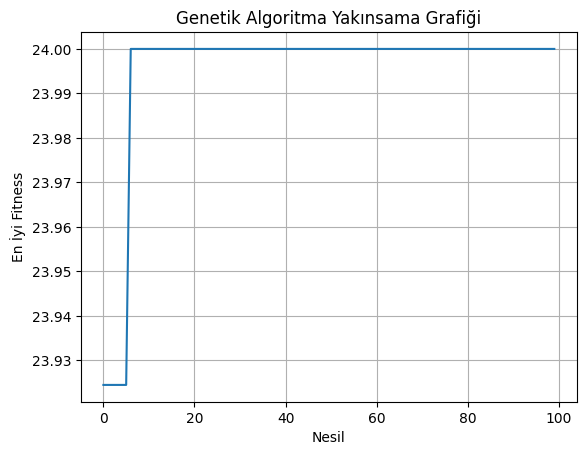

In [6]:
plt.plot(best_fitness)
plt.xlabel("Nesil")
plt.ylabel("En İyi Fitness")
plt.title("Genetik Algoritma Yakınsama Grafiği")
plt.grid(True)
plt.show()


## Sonuç

Genetik Algoritma, belirlenen kısıtlar altında depo verim puanını
maksimize eden çözümlere ulaşmıştır. Algoritma yaklaşık 30–40 nesil
sonrasında yakınsamış ve kararlı sonuçlar üretmiştir.

Elde edilen sonuçlar, Genetik Algoritmaların doğrusal olmayan ve kısıtlı
optimizasyon problemlerinde etkili olduğunu göstermektedir.
